**Stock market portfolio optimization is the process of selecting the best combination of stocks to maximize returns while minimizing the risk, based on historical performance data and financial metrics.**

Stock market portfolio optimization involves analyzing price trends, calculating expected returns and volatilities, and determining the correlations between different stocks to achieve diversification. Using techniques such as **Modern Portfolio Theory (MPT)**, We can construct an efficient portfolio.

The expected results from stock market portfolio optimization include identifying the portfolio with the **highest Sharpe ratio**, which indicates the best risk-adjusted return and provides a clear allocation strategy for the selected stocks to achieve long-term investment goals.

Now, We can use yfinance API for collecting stock market data.

In [273]:
import pandas as pd
import yfinance as yf
from datetime import date,timedelta

In [275]:
# defining time period for the data
# let it be one year from today (Sept 2023 - Sept 2024)
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")
end_date = date.today().strftime("%Y-%m-%d")

In [277]:
# list of 4 stock with largest market cap to download
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

In [279]:
data = yf.download(tickers, start=start_date, end=end_date, progress=False)

In [281]:
data = data.reset_index()

In [283]:
data.head()

Price                       Date    Adj Close                            \
Ticker                            HDFCBANK.NS      INFY.NS  RELIANCE.NS   
0      2023-09-11 00:00:00+00:00  1609.817261  1437.161377  2466.229736   
1      2023-09-12 00:00:00+00:00  1614.848511  1461.155518  2430.600586   
2      2023-09-13 00:00:00+00:00  1621.754272  1458.478638  2442.759277   
3      2023-09-14 00:00:00+00:00  1620.767700  1466.849731  2445.001709   
4      2023-09-15 00:00:00+00:00  1639.363770  1471.376099  2449.536377   

Price                      Close                                         \
Ticker       TCS.NS  HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS   
0       3430.699707  1631.800049  1476.449951  2474.600098  3480.649902   
1       3529.412842  1636.900024  1501.099976  2438.850098  3580.800049   
2       3516.648682  1643.900024  1498.349976  2451.050049  3567.850098   
3       3508.960449  1642.900024  1506.949951  2453.300049  3560.050049   
4       3546.661621  1661.750000  1511.599976  2457.850098  3598.300049   

Price          High  ...          Low                      Open               \
Ticker  HDFCBANK.NS  ...  RELIANCE.NS       TCS.NS  HDFCBANK.NS      INFY.NS   
0       1636.500000  ...  2452.000000  3445.000000  1628.900024  1469.599976   
1       1642.900024  ...  2435.949951  3483.000000  1640.000000  1482.500000   
2       1651.599976  ...  2426.250000  3545.000000  1631.300049  1505.000000   
3       1650.000000  ...  2445.000000  3545.600098  1644.250000  1505.000000   
4       1670.000000  ...  2449.500000  3562.449951  1650.000000  1518.000000   

Price                                Volume                                
Ticker RELIANCE.NS       TCS.NS HDFCBANK.NS  INFY.NS RELIANCE.NS   TCS.NS  
0           2452.0  3462.000000    15786511  4182226     6635537  1783604  
1           2483.0  3492.000000    19516670  6793161     8127833  4476016  
2           2440.0  3571.100098    23210047  4804686     6401669  1754929  
3           2460.0  3570.050049    11769424  6444213     4604818  2604721  
4           2468.0  3567.850098    86705601  8657816    12734296  2952897  

[5 rows x 25 columns]

In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   (Date, )                  242 non-null    datetime64[ns, UTC]
 1   (Adj Close, HDFCBANK.NS)  242 non-null    float64            
 2   (Adj Close, INFY.NS)      242 non-null    float64            
 3   (Adj Close, RELIANCE.NS)  242 non-null    float64            
 4   (Adj Close, TCS.NS)       242 non-null    float64            
 5   (Close, HDFCBANK.NS)      242 non-null    float64            
 6   (Close, INFY.NS)          242 non-null    float64            
 7   (Close, RELIANCE.NS)      242 non-null    float64            
 8   (Close, TCS.NS)           242 non-null    float64            
 9   (High, HDFCBANK.NS)       242 non-null    float64            
 10  (High, INFY.NS)           242 non-null    float64            
 11  (High, RELIANCE.NS)

In [287]:
# Reset MultiIndex columns to single level
data.columns = ['_'.join(col).strip() for col in data.columns.values]
data.columns = pd.Index(data.columns)

In [291]:
# Melting the DataFrame
data_melted = data.melt(id_vars=['Date_'], var_name='Attribute', value_name='Value')

In [293]:
data_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5808 entries, 0 to 5807
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date_      5808 non-null   datetime64[ns, UTC]
 1   Attribute  5808 non-null   object             
 2   Value      5808 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 136.3+ KB


In [295]:
# Extracting Ticker and Attribute information
data_melted[['Attribute', 'Ticker']] = data_melted['Attribute'].str.split('_', n=1, expand=True)
data_melted['Attribute'] = data_melted['Attribute']

In [297]:
data_melted

,Date_,Attribute,Value,Ticker
0,2023-09-11 00:00:00+00:00,Adj Close,1.609817e+03,HDFCBANK.NS
1,2023-09-12 00:00:00+00:00,Adj Close,1.614849e+03,HDFCBANK.NS
2,2023-09-13 00:00:00+00:00,Adj Close,1.621754e+03,HDFCBANK.NS
3,2023-09-14 00:00:00+00:00,Adj Close,1.620768e+03,HDFCBANK.NS
4,2023-09-15 00:00:00+00:00,Adj Close,1.639364e+03,HDFCBANK.NS
...,...,...,...,...
5803,2024-09-02 00:00:00+00:00,Volume,1.216500e+06,TCS.NS
5804,2024-09-03 00:00:00+00:00,Volume,1.717263e+06,TCS.NS
5805,2024-09-04 00:00:00+00:00,Volume,1.265505e+06,TCS.NS
5806,2024-09-05 00:00:00+00:00,Volume,1.688793e+06,TCS.NS


In [299]:
# Pivot the table
df_pivot = data_melted.pivot_table(index=['Date_', 'Ticker'], columns='Attribute', values='Value').reset_index()

# Renaming columns
df_pivot.columns.name = None
df_pivot.rename(columns={'Date_': 'Date'}, inplace=True)

In [303]:
df_pivot.head(5)

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-09-11 00:00:00+00:00,HDFCBANK.NS,1609.817261,1631.800049,1636.500000,1624.000000,1628.900024,15786511.0
1,2023-09-11 00:00:00+00:00,INFY.NS,1437.161377,1476.449951,1478.050049,1464.500000,1469.599976,4182226.0
2,2023-09-11 00:00:00+00:00,RELIANCE.NS,2466.229736,2474.600098,2476.850098,2452.000000,2452.000000,6635537.0
3,2023-09-11 00:00:00+00:00,TCS.NS,3430.699707,3480.649902,3485.699951,3445.000000,3462.000000,1783604.0
4,2023-09-12 00:00:00+00:00,HDFCBANK.NS,1614.848511,1636.900024,1642.900024,1625.050049,1640.000000,19516670.0


Now, let's import visualization libraries and have a look at the stock market performance of these companies in the stock market over time:s

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns

In [338]:
%matplotlib inline

In [308]:
stock_data = df_pivot

In [310]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [314]:
stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)

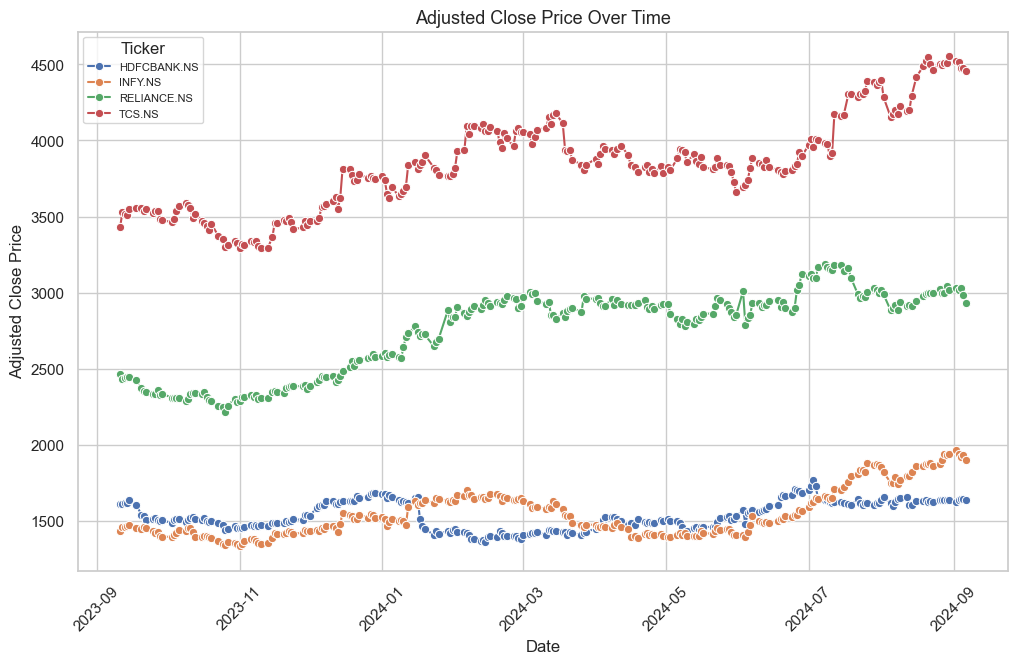

In [324]:
plt.figure(figsize=(12, 7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=13)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.legend(title='Ticker', title_fontsize='12', fontsize='8')
plt.grid(True)

plt.xticks(rotation=45)
plt.show()

The graph displays the adjusted close prices of four stocks **(HDFCBANK.NS, INFY.NS, RELIANCE.NS, TCS.NS)** over time from Sept 2023 to Sept 2024. It highlights that TCS has the highest adjusted close prices, followed by RELIANCE, INFY (Infosys), and HDFCBANK. The prices for RELIANCE and TCS show noticeable upward trends, which indicates strong performance, while HDFCBANK and INFY exhibit more stability with relatively lower price fluctuations.

Now, let’s compute the 50-day and 200-day moving averages

In [328]:
short_window = 50
long_window = 200

stock_data.set_index('Date', inplace=True)
unique_tickers = stock_data['Ticker'].unique()

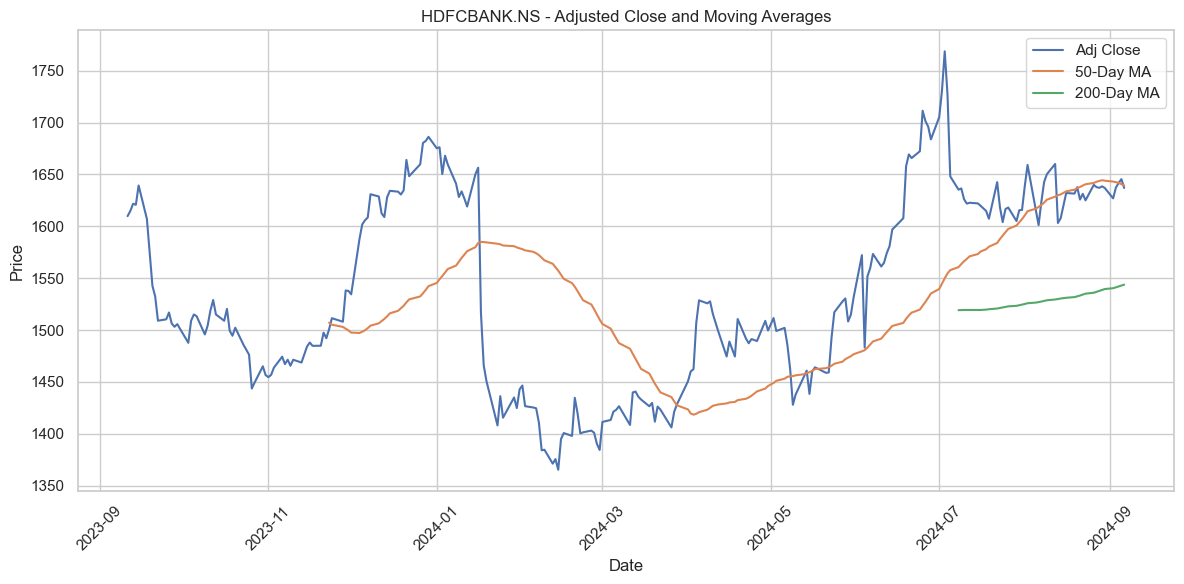

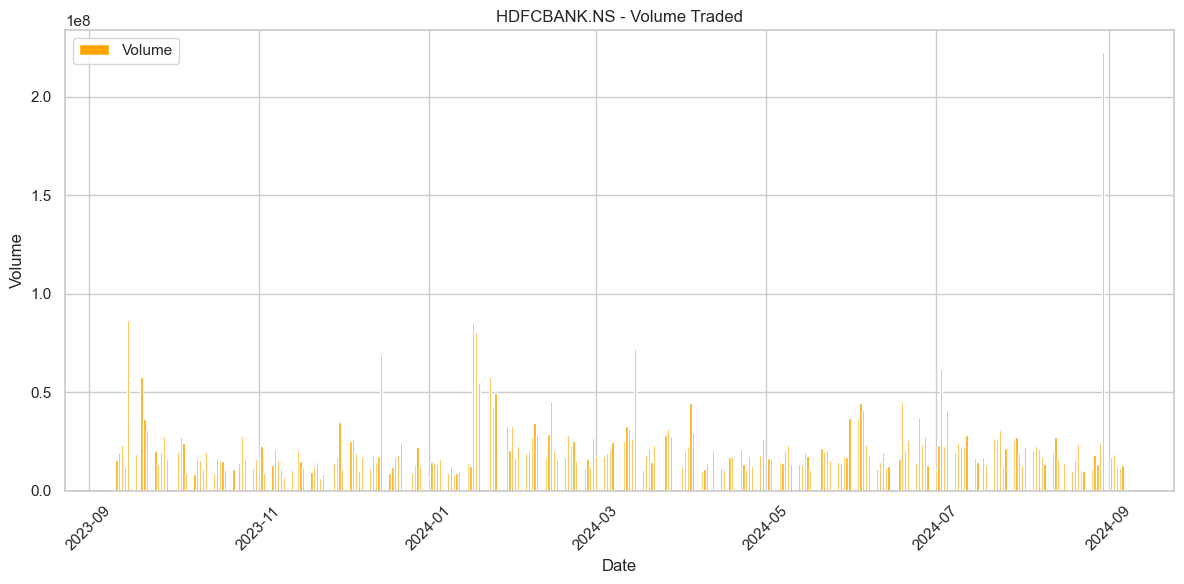

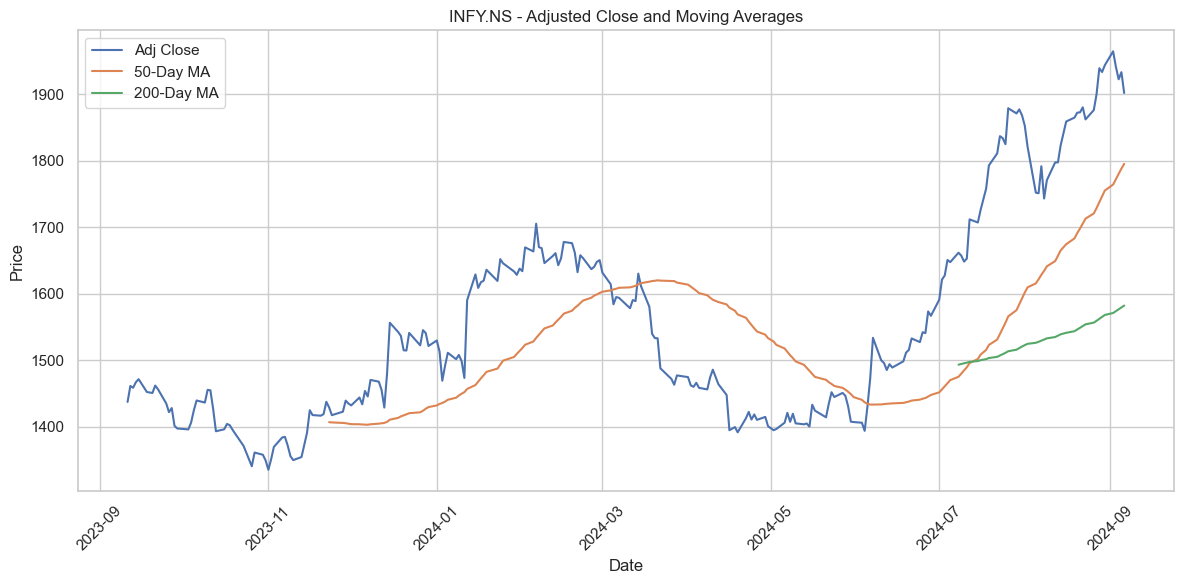

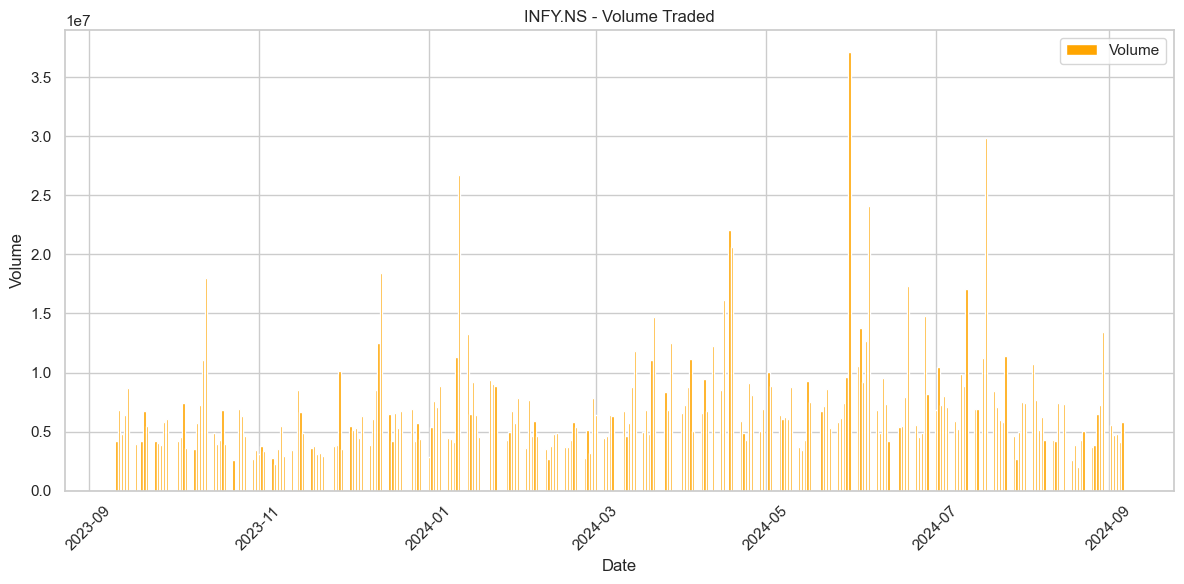

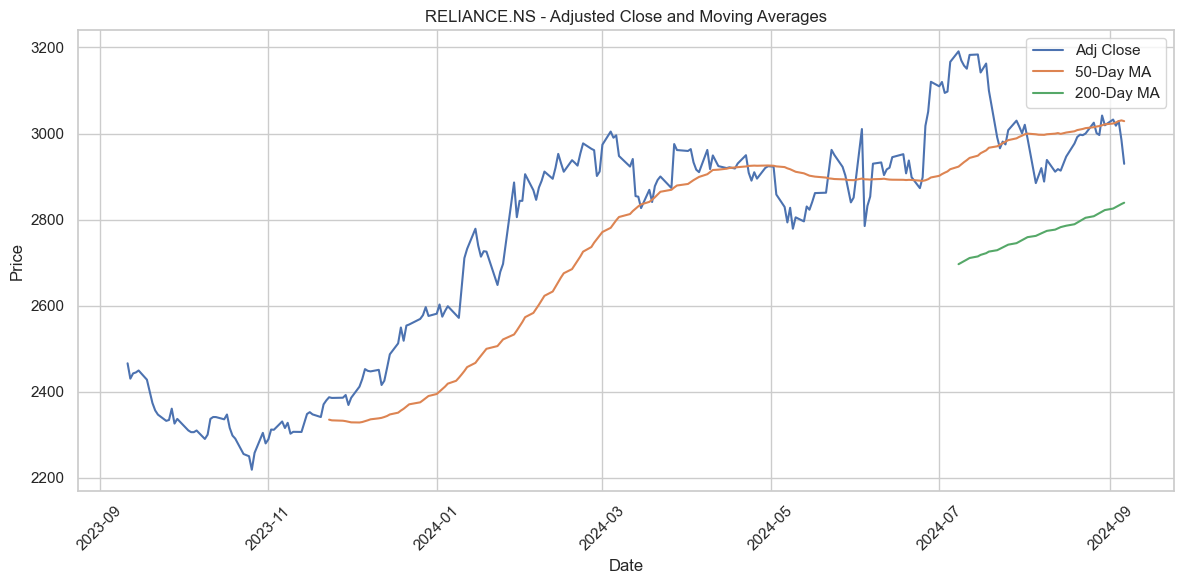

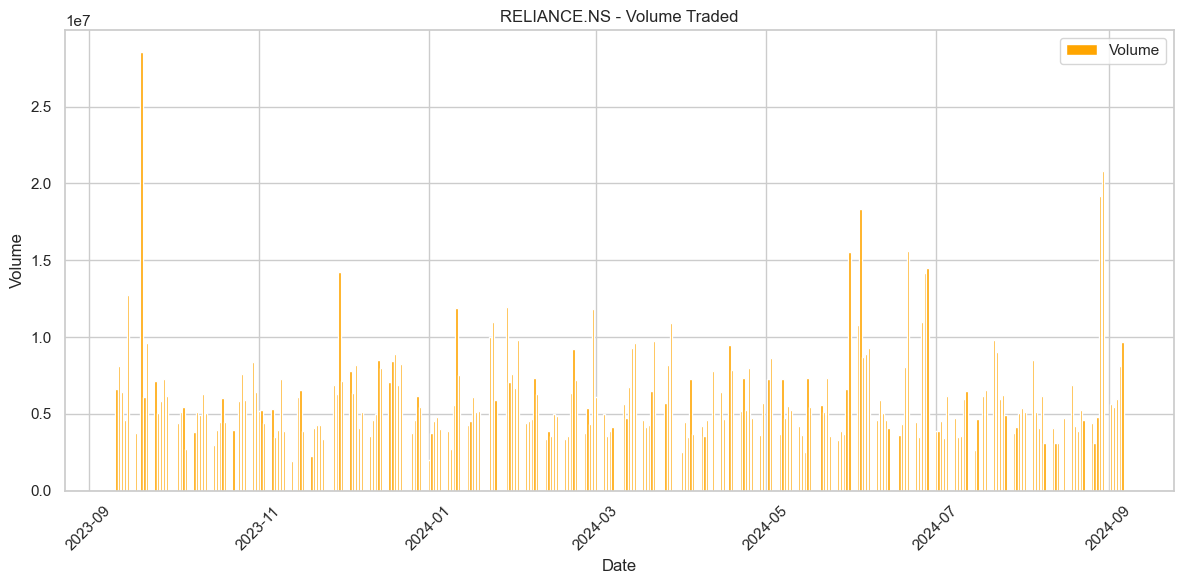

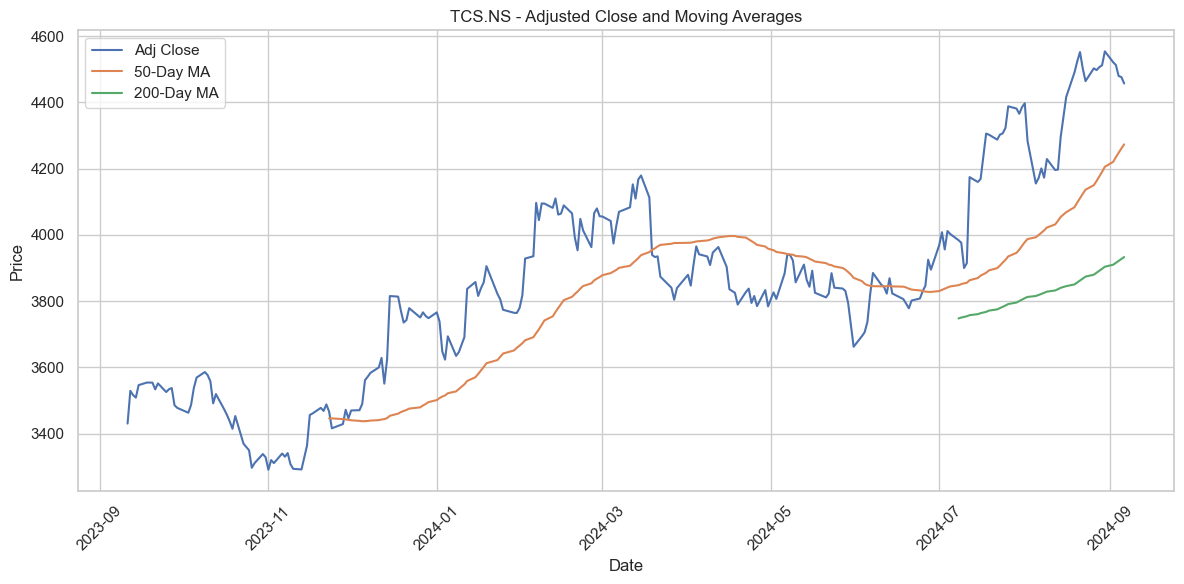

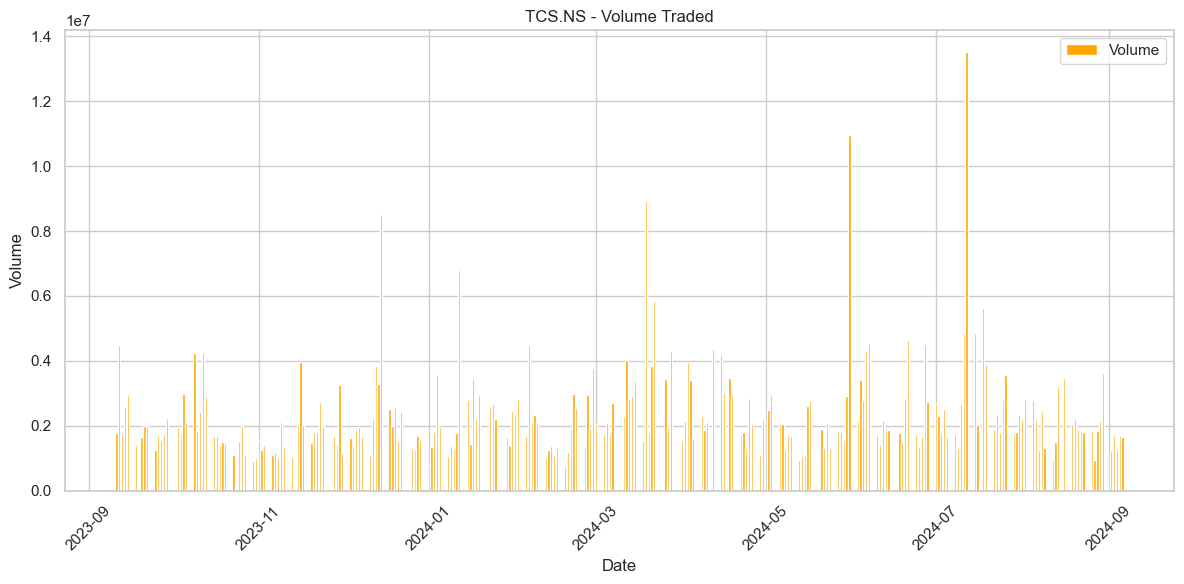

In [340]:
for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

For HDFCBANK and INFY, the prices initially decline but later show signs of recovery, as indicated by the moving averages. RELIANCE and TCS display a more consistent upward trend in their adjusted close prices. The volume traded graphs highlight significant trading activity at various points, with spikes indicating high trading volumes, particularly noticeable in HDFCBANK and RELIANCE. These insights are crucial for understanding price movements and trading behaviours, which assist in making informed investment decisions. We can see recent increase in trading volume in TCS.

Now, let’s have a look at the distribution of daily returns of these stocks:

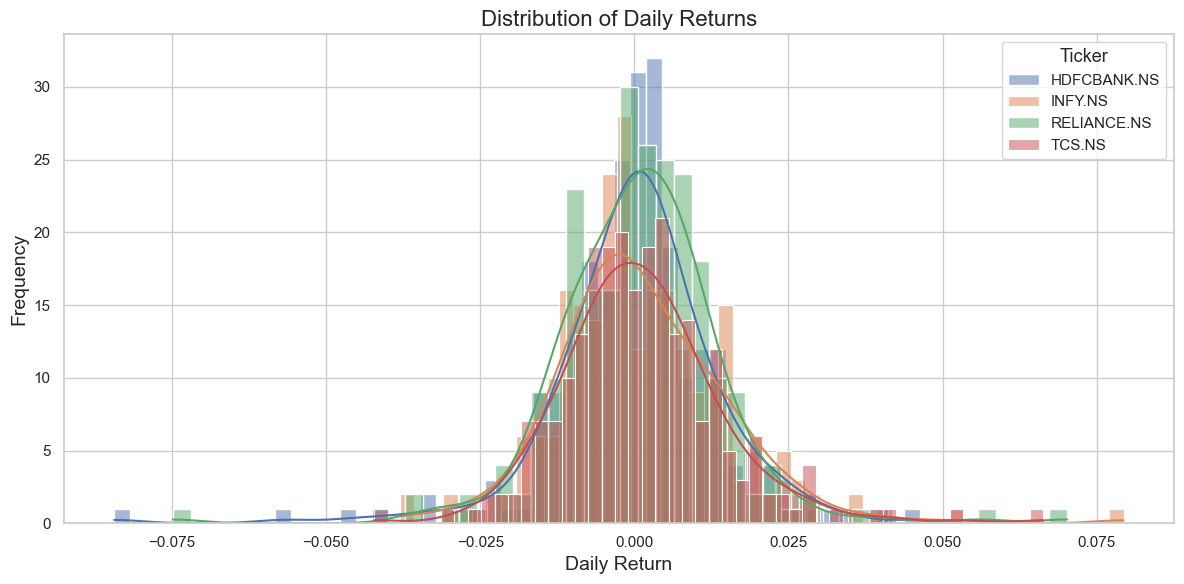

In [344]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

The distributions are approximately normal, centred around zero, which indicates that most daily returns are close to the average return. However, there are tails on both sides, which reflect occasional significant gains or losses. **INFY and RELIANCE** appear to have slightly wider distributions, which suggests **higher volatility** compared to HDFCBANK and TCS.

Now, let’s see if there’s any correlation between all these stocks:

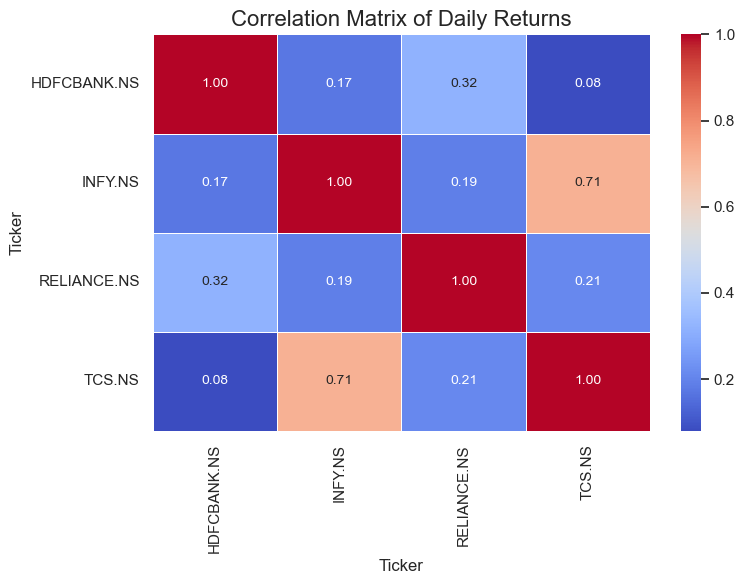

In [352]:
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

INFY and TCS have a high positive correlation (0.71), which indicates that they tend to move in the same direction. HDFCBANK has a moderate positive correlation with RELIANCE (0.32) and a low correlation with INFY (0.17) and TCS (0.08). RELIANCE shows a low correlation with INFY (0.19) and TCS (0.21). These varying correlations suggest potential diversification benefits; combining stocks with lower correlations can reduce overall portfolio risk.

**Portfolio Optimization**

Now, using Modern Portfolio Theory, we can construct an efficient portfolio by balancing risk and return. We will: 
1. Calculate the expected returns and volatility for each stock.
2. Generate a series of random portfolios to identify the efficient frontier.
3. Optimize the portfolio to maximize the Sharpe ratio, which is a measure of risk-adjusted return.

Let’s calculate the expected returns and volatility for each stock:

In [357]:
import numpy as np

In [359]:
# 252 is number of trading days in a year
expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.041195,0.216907
INFY.NS,0.317607,0.222838
RELIANCE.NS,0.203043,0.214643
TCS.NS,0.295025,0.207574


**INFY has the highest expected return** (31.76%) and moderate volatility (22.28%), which indicates a potentially high-reward investment with relatively higher risk. **TCS** also has similar expected return of 29.5% with less volatility (20.75%) compared to INFY. **RELIANCE** has moderate expected returns (20.30%) with moderate volatility (21.46%). **HDFCBANK has the lowest expected return** (4.12%) and moderate volatility (21.69%), which makes it the least attractive in terms of risk-adjusted returns.

Let’s generate the random portfolios and plot the efficient frontier:

In [364]:
# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

In [366]:
# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252
np.random.seed(42)

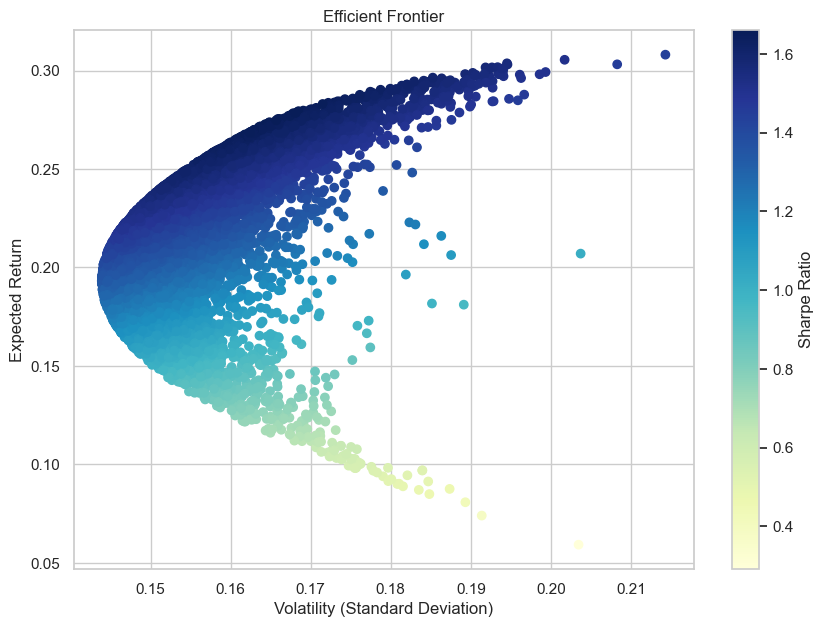

In [368]:
for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

The gradient shows that portfolios with higher Sharpe ratios (darker blue) provide better risk-adjusted returns.

Identifying the portfolio with maximum Sharpe ratio

In [372]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.2737539497608774, 0.16485054849727637, 1.6606189803814957)

The portfolio with the maximum Sharpe ratio has the following characteristics:

Expected_Return: 27.37% <br>
Volatility: 16.48% <br>
Sharpe Ratio: 1.66

Next, let’s identify the weights of the stocks in the portfolio that yield the maximum Sharpe ratio:

In [395]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,HDFCBANK.NS,0.281504
1,INFY.NS,0.245652
2,RELIANCE.NS,0.268975
3,TCS.NS,0.203869


The output shows a diversified portfolio with the following allocations:

1. HDFCBANK: 28.15%
2. RELIANCE: 26.89%
3. INFY:     24.56%
4. TCS:      20.38%

This balanced allocation aims to maximize returns while minimizing risk by leveraging individual stock performances and their correlations.   